# US Arrests 1973 Dataset <br> Unsupervised Learning Report
##### BY: Etienne Bauscher - 2019-05-30
### <u>Introduction</u>
The contents of this report will display the exploration of the correlations between different states. This is achieved by utilising unsupervised learning method Principle Component Analysis as well as hierarchical and k-means clustering.<br><br>
The data that we will be exploring contains fifty states with four observations (continous numerical variables) per state measured as follows:
- Murder   --> numeric --> Murder arrests (per 100,000)
- Assault  --> numeric --> Assault arrests (per 100,000)
- UrbanPop --> numeric --> Percent urban population
- Rape     --> numeric --> Rape arrests (per 100,000)

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import math
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn import metrics
%matplotlib inline
# Styling our plots :)
plt.style.use('ggplot')

### <u>Exploring the Data</u>
Looking at our variable names in the dataset we can see that the variable names are all intuitively understandable. For their measurements however, I have researched it a bit and included the measures in the introduction. As we are scaling the data later on, we won't rename the variables to include these.
<p>I have however renamed the set index to 'State' because we are looking at the 50 states of America and not cities. The initial column name was 'City'.

In [2]:
# READ the DATA
arrest_df = pd.read_csv('UsArrests.csv', delimiter=',', index_col='City', header=0)
arrest_df.index.names = ['State'] 
arrest_df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


<p>Our boxplots of the variables point out some outliers in our 'Rape' variable, however, as it is not extreme in it's position outside of the range of data, there is no need for great concern in terms of incorrectly supplied data. It is important to note here that we will be using a scaling technique later on called Standardization that is least affected by outliers in scaling techniques available.</p>
<p><b>Boxplots</b></p>

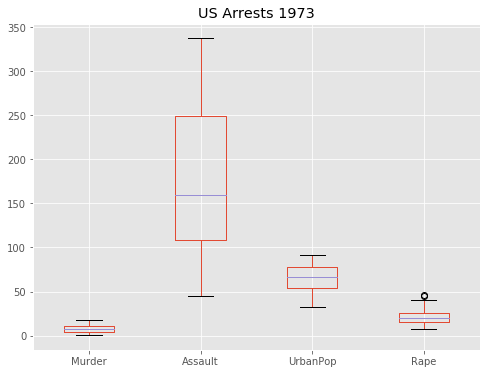

In [3]:
# boxplots
arrest_df.boxplot(figsize=(8,6));
plt.title('US Arrests 1973');

In [4]:
arrest_df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='State')

In [5]:
arrest_df.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

 <p>In describing the data we can see that the observations per variable are evenly distributed (50 each) which makes our dataset very balanced from an observations point of view. The 'Assault' variable stands out as one with a lot of presence in terms of it's measurement. Compared to the 'Rape' and 'Murder' variables, 'Assault' shows prominence as we have in observation on average, 170 cases per every 100,000 arrests in the US. It also has a minimum of 45 and a maximum of 337 cases per 100,000 arrests. It's standard deviation points out that the largest variance exists in this variable by far with a score of 83.37.</p>
<p>We can see that the 'Murder' variable is the least prominent which is how it is supposed to be. We would in essence, as humanity, love, not to have any numbers in this variable.</p>
    <p>The 'UrbanPop' variable cannot be compared with the other three in this regard as it merely shows the percentage of the population in urban areas, however, we will explore it's correlation to the different arrest variables shortly.</p>
<p>The Histograms and the Bivariate Plots show the variables described above displaying their presence as mentioned.</p>
<p><b>Our Data Described</b></p>

In [6]:
# I transposed the original table to describe it.
table = arrest_df.describe()
ninety_table = table.transpose()
ninety_table.to_csv('sum_table.csv')
ninety_table

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


<b>Histograms</b>

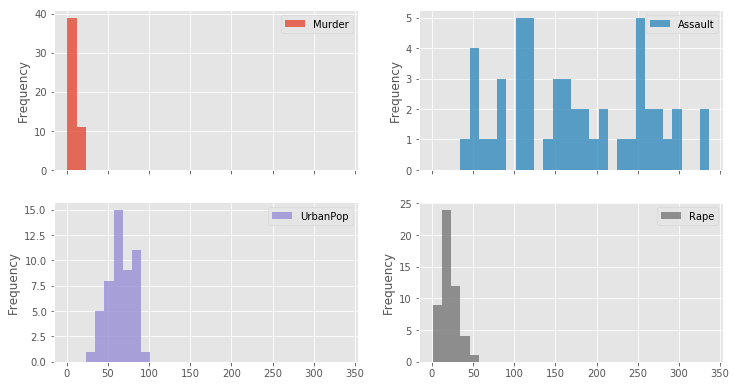

In [7]:
# histograms
arrest_df.plot(kind='hist',alpha=0.8,bins = 30, subplots=True, layout=(3,2), legend=True, figsize=(12,10));

<b>Bivariate Plot</b>

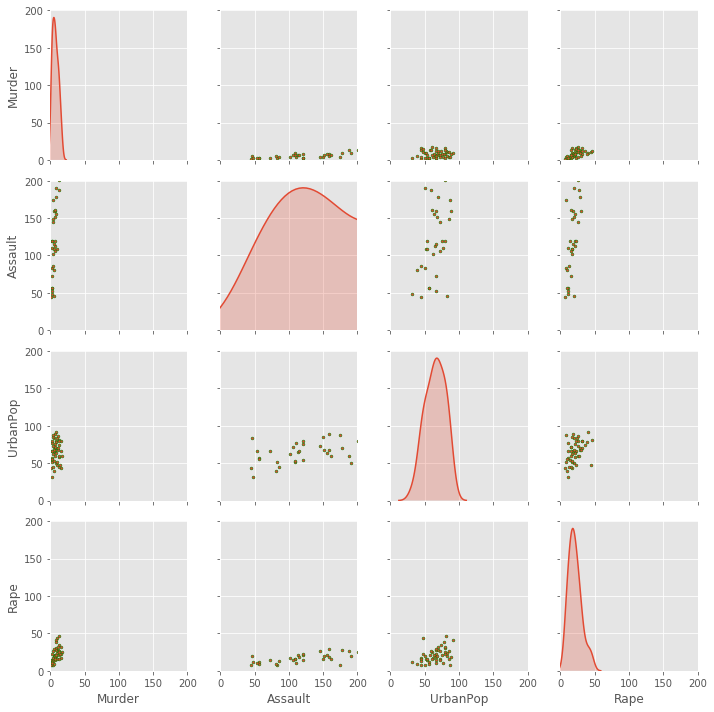

In [8]:
# Bivariate Plot
g_plt = sns.pairplot(arrest_df, diag_kind="kde", markers="o",
                 plot_kws=dict(s=8, edgecolor="g",
                               linewidth=0.5), diag_kws=dict(shade=True));
g_plt.set(ylim=(0, 200));
g_plt.set(xlim=(0, 200));

### <u>Missing Values</u>

<p>It is great to see a well prepared dataset with no missing values and properly set data types per variable which is what this dataset is about. It makes the job of machine learning so much easier.

### <u>Correlation Analysis</u>
<p>Our correlation plot below clearly points out the fact that there are only positive correlations between the variables which means that the variables move in the same direction. The strongest being 'Murder' and 'Assault' with a 0.802 correlation between them. Next we have a positive correlation between 'Assault' and 'Rape' at 0.665 and 0.564 correlation between 'Murder' and 'Rape'. Our weakest correlations are found between 'UrbanPop' and the rest of the variables which makes logical sense when looking at how the variables are measured and what they represent.</p>
    
<p><b>Correlation Plot</b></p>

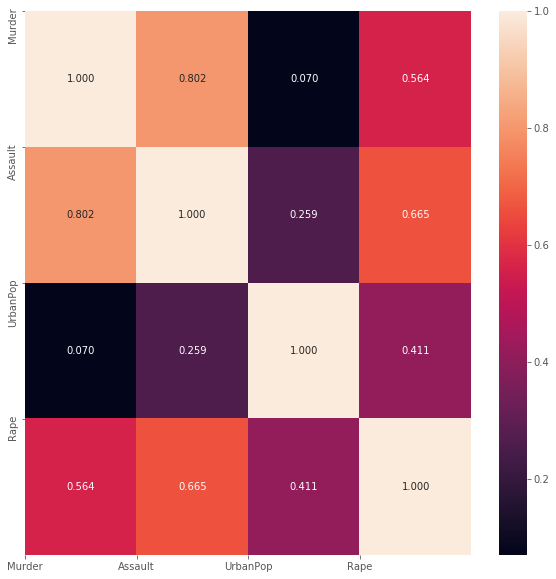

In [9]:
#unscaled
corr = arrest_df.corr()
plt.figure(figsize=(10,10));
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".3f");
# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns);
# show plot

<p> We will however apply Principal Component Analysis to find the underlying variables that best constitute our observations' direction and spread and reduce the dimensionality of the dataset.<p>When it comes to standardizing the data for Principle Component Analysis I have decided to explore both options. On the one end we will have standardized data and on the other, non-standardized data that will be utilised in the PCA and Clustering analysis.</p>
<p>First though, we will look at the cumulative variance explained as we need to establish how many components we will need to accurately represent the data we have in all the variables.</p>

<p><b>Cumulative Variance Explained</b></p>

<p> As I looked at the Cumulative Variance Explained curve it became clear that we need three principle components to describe one hundred percent of the data in the dataset. If we cover 80% of the data however, we will be safe and therefore we only need two principal components. It will make the task of processing and visualising the data a lot easier and we will not lose any valuable information in the process.
</p>

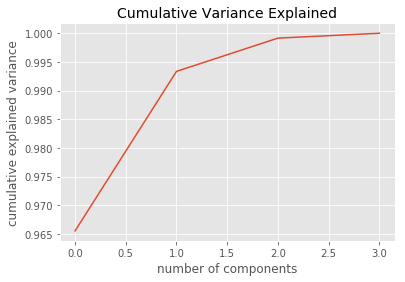

In [10]:
# fit the data to a pca instance
pca3 = PCA().fit(arrest_df.values);
plt.plot(np.cumsum(pca3.explained_variance_ratio_));
plt.title("Cumulative Variance Explained", fontsize = 14);
plt.xlabel('number of components');
plt.ylabel('cumulative explained variance');

### <u>PCA - Non-Standardized</u>

<p> With the two components decided, the PCA fitted and our data transformed, we can see that the values in our data takes on a whole new form. Still not standardized, we can see that the values for the first five observations / states in our dataset now looks completely different. This is the purpose of PCA, to the reduce dimensionality by combining the most important aspects of all the variables into the amount of variables determined in the cumulative variance explained. In this case, it is two, PC1 and PC2.</p>

<p><b>Data Frame Transformed</b></p>

In [11]:
# unscaled
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(arrest_df)
# transform the components into a pandas data frame
principalDf = pd.DataFrame(data=principalComponents, columns=['PC 1', 'PC 2'])
principalDf.index = arrest_df.index
principalDf.head()

,PC 1,PC 2
State,,
Alabama,64.802164,11.448007
Alaska,92.827450,17.982943
Arizona,124.068216,-8.830403
Arkansas,18.340035,16.703911
California,107.422953,-22.520070


<p>In describing our newly formed and transformed data frame, we now see that our statistical measures have taken on a different shape than before in terms of value. Our variances have been drastically reduced and this is one of the outcomes of PCA as it removes all the data along the least important principal axis or axes and keeps the data with the highest variance. Among these the variance is expected not to be great as they are all in the high end of each of the variables' range. Depending on the data, the variance should not be high. If our dataset had variables containing extreme variance in terms of measurement between variables, then standardizing the data first would narrow down this problem. In this dataset we do not have such a great concern as three of our four variables are measured in the same way and have high positive correlations between each other.</p>

<p><b>Data Frame Described</b></p>

In [12]:
principalDf.describe()

,PC 1,PC 2
count,5.000000e+01,5.000000e+01
mean,1.541878e-14,5.648815e-15
std,8.373240e+01,1.421240e+01
min,-1.274956e+02,-2.429121e+01
25%,-6.245852e+01,-1.170149e+01
50%,-1.098298e+01,-2.100031e+00
75%,7.881348e+01,9.500174e+00
max,1.652444e+02,3.109662e+01


<p>With non-standardized data and no PCA performed on the dataset the biplot shows our findings in the correlation plot quite clearly. The length of the arrows represent the loading of the variables. Looking at our earliest described dataframe we can see that 'Assault' and 'UrbanPop' are the most prominent in terms of measure and spread with the highest standard deviations between them. Also, none of the variables point to the left of the zero value on the x-axis which would have confirmed any negative correlations. The weakest correlation in the dataset is between variables 'Murder' and 'UrbanPop'. Let's see later on how standardization will affect our fidnings here.</p>
<p><b>Biplot - Non Standardized</b></p>

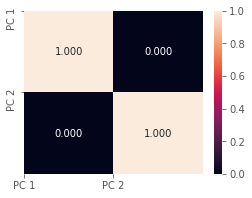

In [13]:
#unscaled
corr = principalDf.corr()
plt.figure(figsize=(4,3));
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".3f");
# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns);
# show plot

In [14]:
def biplot(df):
    # Fit on 2 components
    pca = PCA(n_components=2, whiten=True).fit(df)

    # Plot transformed/projected data
    ax = pd.DataFrame(pca.transform(df), columns=['PC1', 'PC2']).plot(
        kind='scatter', x='PC1', y='PC2', figsize=(8, 8), color='g', s=8)
    # Plot arrows and labels
    for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
        ax.arrow(0, 0, pc1, pc2, linewidth=0.5, width=0.011, fc='r', ec='b')
        ax.annotate(df.columns[i], (pc1, pc2), size=13)
    return ax

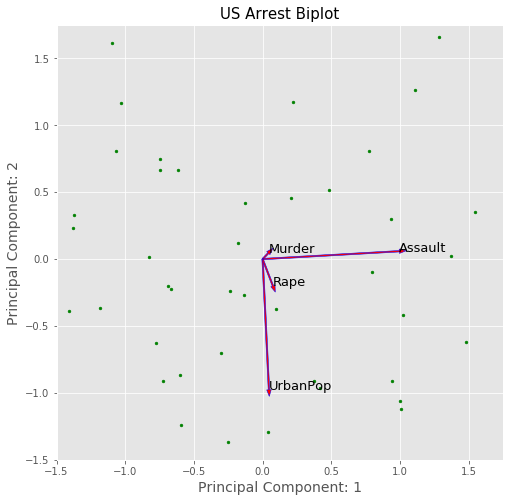

In [15]:
# unscaled
ax = biplot(arrest_df);
plt.title("US Arrest Biplot", fontsize=15);
plt.xlabel("Principal Component: 1", fontsize=14);
plt.ylabel("Principal Component: 2", fontsize=14);
ax.set_xlim([-1.5, 1.75]);
ax.set_ylim([-1.5, 1.75]);

In [16]:
def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:, 0])
    yvector = components_[1] * max(transformed_features[:, 1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = {columns[i]: math.sqrt(
        xvector[i]**2 + yvector[i]**2) for i in range(num_columns)}
    important_features = sorted(
        zip(important_features.values(), important_features.keys()), reverse=True)
    #print ("Features by importance:\n", important_features)
    return(important_features)

<p><b>Visualizing Important Features</b></p>

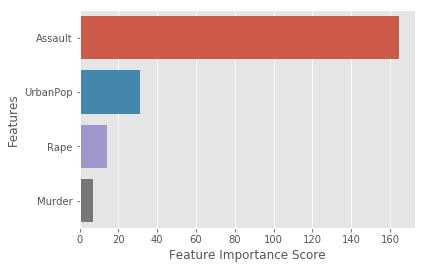

In [17]:
#unscaled
T = pca.fit_transform(arrest_df)
comp = get_important_features(
    T, pca.components_, arrest_df.columns[:].values)

dff = pd.DataFrame(comp, columns=['Importance', 'Variable'])


# Creating a bar plot
sns.barplot(x=dff.iloc[:, 0], y=dff.iloc[:, 1])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
#plt.title("Visualizing Important Features")
plt.show()

### <u>PCA - Standardized</u>
<p>Standardizing our data applies scaling to all our variables so that they can be easily compared. Looking at our dataset now we can see the values transformed.</p><p>After the application of the Principal Components Analysis with two components we have two new variables and when we do a correlation analysis on these we will find that the two principal components are linearly not correlated. This is the function of PCA, to use orthogonal transformation to convert a set of observations of poissibly correlated variables into a set of values of linearly uncorrelated variables call principal components.</p>
<p><b>Data Frame Transformed</b></p>

In [18]:
#scaled
# Separating out the features
X = arrest_df.iloc[:, :4]
X = StandardScaler().fit_transform(X)
corr_df = pd.DataFrame(data=X, index=arrest_df.index, columns=arrest_df.columns)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [19]:
corr_df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


In [267]:
%%capture
# scaled
corr = corr_df.corr();
plt.figure(figsize=(8,8))
# Generate Heat Map, allow annotations and place floats in map;
sns.heatmap(corr, annot=True, fmt=".3f");
# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns);
# show plot

<b>PCA on Standardized Data Applied</b>

In [20]:
# scaled
pca1 = PCA(n_components=2)
principalComponents1 = pca1.fit_transform(corr_df)
# transform the components into a pandas data frame
principalDf1 = pd.DataFrame(data=principalComponents1, columns=['PC 1', 'PC 2'])
principalDf1.index = arrest_df.index
principalDf1.head()

,PC 1,PC 2
State,,
Alabama,0.985566,1.133392
Alaska,1.950138,1.073213
Arizona,1.763164,-0.745957
Arkansas,-0.141420,1.119797
California,2.523980,-1.542934


<p><b>Correlation Plot</b></p>

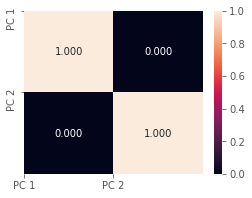

In [21]:
# scaled
corr1 = principalDf1.corr()
plt.figure(figsize=(4,3))
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr1, annot=True, fmt=".3f");
# Apply xticks
plt.xticks(range(len(corr1.columns)), corr1.columns);
# Apply yticks
plt.yticks(range(len(corr1.columns)), corr1.columns);
# show plot

<p>Feature importance on standardized data paints a completely different picture to that of our findings of non-standardized data. <br>Where 'Assault' was the most loaded variable, we now have 'UrbanPop' as the most loaded variable. Through standardization, which subtracts the mean from the datapoints first and then it divides the data by the standard deviation, all variables' unit variance lean towards 1 (We can see this in the standard deviation of the described table below). This brings our data to a place where we can see which variable is most important.</p>
<p><b>Visualising Feature Importance</b></p>

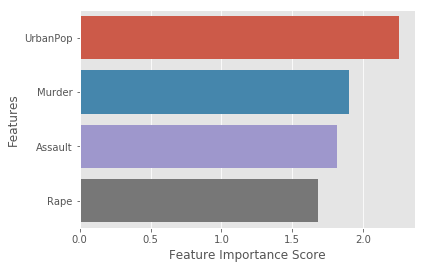

In [22]:
# Scaled
T_tr = pca.fit_transform(X)
comp = get_important_features(
    T_tr, pca.components_, arrest_df.columns[:].values)

dff = pd.DataFrame(comp, columns=['Importance', 'Variable'])


# Creating a bar plot
sns.barplot(x=dff.iloc[:, 0], y=dff.iloc[:, 1])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
#plt.title("Visualizing Important Features")
plt.show()

<b>Features Described</b>

In [23]:
corr_df.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-8.437695e-17,1.298961e-16,-4.263256e-16,8.326673e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.620693e+00,-1.524362e+00,-2.340661e+00,-1.502548e+00
25%,-8.611383e-01,-7.486054e-01,-7.704502e-01,-6.640245e-01
50%,-1.247758e-01,-1.425453e-01,3.210209e-02,-1.220847e-01
75%,8.029251e-01,9.483628e-01,8.521012e-01,5.330962e-01
max,2.229265e+00,2.015028e+00,1.776781e+00,2.671197e+00


<p>With our standardized data visualized in the biplot below, we find now that as with the feature importance plot, the variables have comparative nature and their importance in this dataset is almost equal.</p>
<p><b>Biplot</b></p>

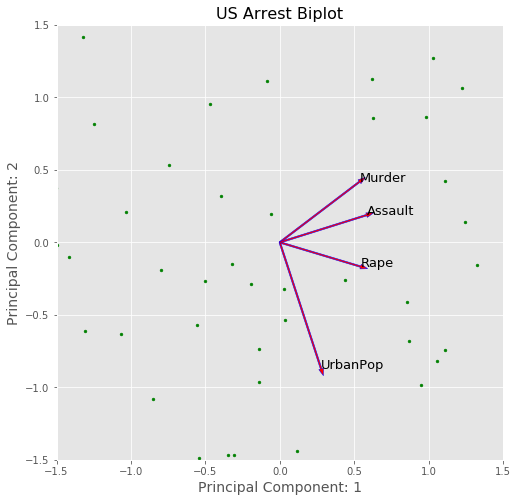

In [24]:
# scaled
ax = biplot(corr_df);
plt.title("US Arrest Biplot", fontsize = 16);
plt.xlabel("Principal Component: 1", fontsize = 14);
plt.ylabel("Principal Component: 2", fontsize = 14);
ax.set_xlim([-1.5, 1.5]);
ax.set_ylim([-1.5, 1.5]);

### <u>Cluster Analysis</u>
<p>In our final section, cluster analysis, I chose hierarchical and k-means clustering for processing the data. I decided to use as a final model, non-standardized data in a k-means algorithm with surprising results but first, let us draw the dendograms and decide how many clusters we will utilise in our analysis.</p>
    
<p>Applying various methods (ward, single, complete and average) of measuring the distances between the datapoints we can see that method 'ward' produces the most evenly distributed clusters. Drawing a line through our highest linkage (blue in this case), we see that we have two perfectly formed clusters dividing further down into the relationships established by the method's algorithm.</p>

<p><b>Dendograms</b></p>

In [25]:
# function
def dendogram_plot(method):
    plt.figure(figsize=(9,6))
    plt.title("US Arrests Dendograms - " + method + " method")
    dend = shc.dendrogram(shc.linkage(corr_df, method=method))

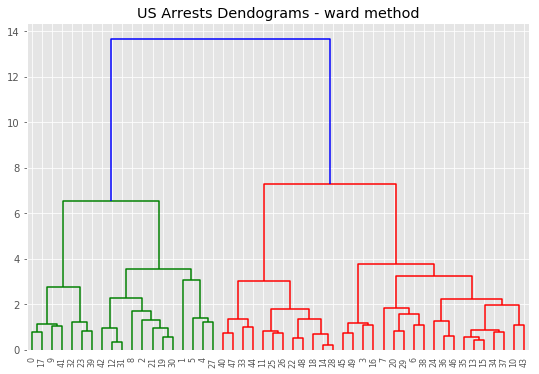

In [26]:
dendogram_plot('ward')

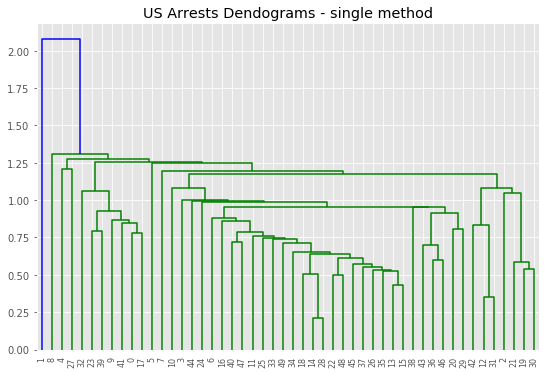

In [27]:
dendogram_plot('single')

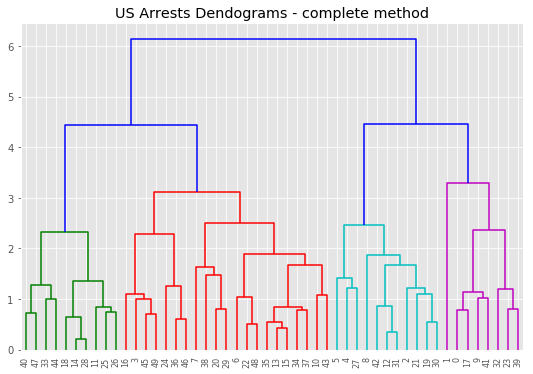

In [28]:
dendogram_plot('complete')

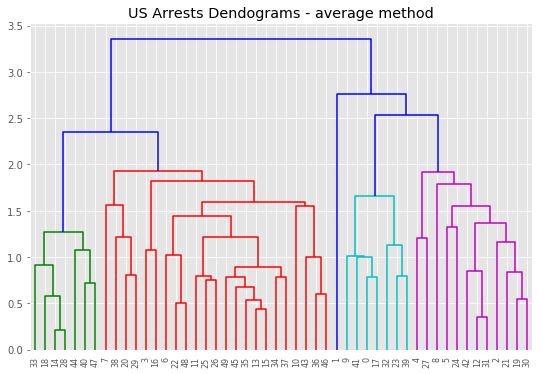

In [29]:
dendogram_plot('average')

In [30]:
def hierarchical_clustering(method, data, components):
    cluster = AgglomerativeClustering(
        n_clusters=2, affinity='euclidean', linkage=method);
    cluster.fit_predict(data);
    data['Cluster'] = cluster.labels_;
    print('Cluster Value Count:\n' + str(data['Cluster'].value_counts()));
    sns.lmplot(data=data, x='PC 1', y='PC 2', hue='Cluster',
               fit_reg=False, legend=True, legend_out=True, height=7);
    plt.title('US Arrests: ' + method + ' method with 2 clusters.');
    print(data);
    print('\nSilhouette Score: ' + str(metrics.silhouette_score(components,
                                                                cluster.labels_, metric='euclidean')));

### <u>Hierarchical Clustering</u>
<p> I tried various methods in the hierarchical clustering technique algorithm. With two clusters giving us the best results as determined with our dendograms, all methods produced more or less the same clusters and Silhouette scores with the exception of maybe one or two states being grouped in a different cluster.</p>
<p>With hierarchical clustering, the algorithm groups together the states in a hierarchical manner based on the states relative distances. I have utilsed the Euclidean distance method here for measurement.<br> We can deduct from the states grouped together that one of the main components to the clustering together is the size of the state. Smaller states are grouped together and so are larger states. Smaller states account to 19 of the 50 states and the larger 31. This is because of the fact that even after scaling, smaller states would have lesser arrests than larger states as the arrests are measured per 100,000.
<p><b>Hierarchical Clustering</b></p>

Cluster Value Count:
0    31
1    19
Name: Cluster, dtype: int64
                    PC 1      PC 2  Cluster
State                                      
Alabama         0.985566  1.133392        1
Alaska          1.950138  1.073213        1
Arizona         1.763164 -0.745957        1
Arkansas       -0.141420  1.119797        0
California      2.523980 -1.542934        1
Colorado        1.514563 -0.987555        1
Connecticut    -1.358647 -1.088928        0
Delaware        0.047709 -0.325359        0
Florida         3.013042  0.039229        1
Georgia         1.639283  1.278942        1
Hawaii         -0.912657 -1.570460        0
Idaho          -1.639800  0.210973        0
Illinois        1.378911 -0.681841        1
Indiana        -0.505461 -0.151563        0
Iowa           -2.253646 -0.104054        0
Kansas         -0.796881 -0.270165        0
Kentucky       -0.750859  0.958440        0
Louisiana       1.564818  0.871055        1
Maine          -2.396829  0.376392        0
Maryland   

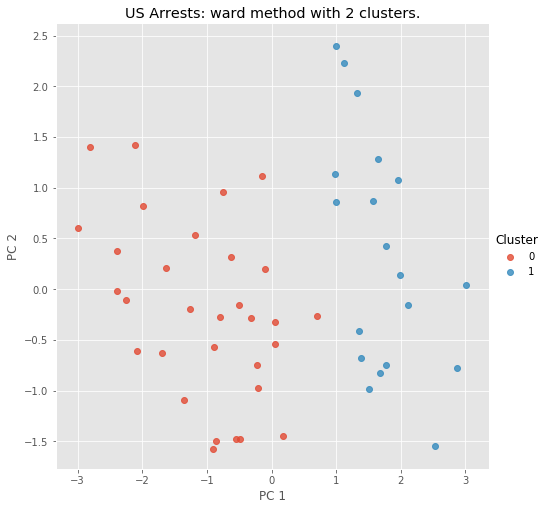

In [31]:
hierarchical_clustering('ward', principalDf1, principalComponents1)

In [32]:
def kmeans_clustering(data, components, std):
    kmeans1 = KMeans(n_clusters=2, max_iter=400,
                     random_state=7, algorithm='auto')
    kmeans1.fit(data)
    kmeans1.predict(data)
    data['Cluster'] = kmeans1.labels_
    print('Cluster Value Count:\n' + str(data['Cluster'].value_counts()));
    print(data)
    sns.lmplot(data=data, x='PC 1', y='PC 2', hue='Cluster',
               fit_reg=False, legend=True, legend_out=True, height=7)
    plt.title('US Arrests with 2 Clusters - ' + std)
    print('\nSilhouette Score: ' + str(metrics.silhouette_score(components,
                                   kmeans1.labels_, metric='euclidean')))

### <u>K-Means Clustering</u>

<p> In K-means clustering I have taken the approach of feeding the algorithm standardized and non-standardized data. The results once again similar to the hierarchical clustering algorithm with one or two states here and there clustered to a different cluster. This is due to the inner workings of the different algorithms and in the last model, the non-standardized data fed to the k-means algorithm. One noticable difference that I want to point out is the difference in Silhoutte Score from Standardized to Non-Standardized data which is 0.47580 and 0.60000 respectively. I suppose both are acceptable but one must ask whether we could do this problem with Non-Standardized data only.</p>
<p><b>K-Means Clustering - Standardized</b></p>

Cluster Value Count:
0    30
1    20
Name: Cluster, dtype: int64
                    PC 1      PC 2  Cluster
State                                      
Alabama         0.985566  1.133392        1
Alaska          1.950138  1.073213        1
Arizona         1.763164 -0.745957        1
Arkansas       -0.141420  1.119797        0
California      2.523980 -1.542934        1
Colorado        1.514563 -0.987555        1
Connecticut    -1.358647 -1.088928        0
Delaware        0.047709 -0.325359        0
Florida         3.013042  0.039229        1
Georgia         1.639283  1.278942        1
Hawaii         -0.912657 -1.570460        0
Idaho          -1.639800  0.210973        0
Illinois        1.378911 -0.681841        1
Indiana        -0.505461 -0.151563        0
Iowa           -2.253646 -0.104054        0
Kansas         -0.796881 -0.270165        0
Kentucky       -0.750859  0.958440        0
Louisiana       1.564818  0.871055        1
Maine          -2.396829  0.376392        0
Maryland   

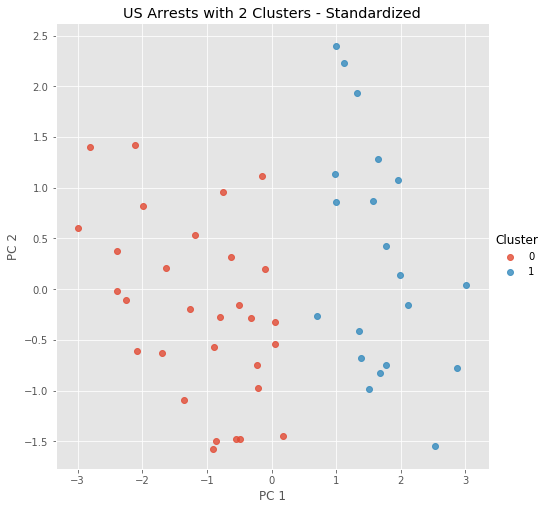

In [33]:
kmeans_clustering(principalDf1, principalComponents1, 'Standardized')

<p><b>K-Means Clustering - Non-Standardized</b></p>

Cluster Value Count:
0    29
1    21
Name: Cluster, dtype: int64
                      PC 1       PC 2  Cluster
State                                         
Alabama          64.802164  11.448007        1
Alaska           92.827450  17.982943        1
Arizona         124.068216  -8.830403        1
Arkansas         18.340035  16.703911        1
California      107.422953 -22.520070        1
Colorado         34.975986 -13.719584        1
Connecticut     -60.887282 -12.932530        0
Delaware         66.731025  -1.353798        1
Florida         165.244370  -6.274690        1
Georgia          40.535177   7.290240        1
Hawaii         -123.536106 -24.291208        0
Idaho           -51.797002   9.469191        0
Illinois         78.992097 -12.897060        1
Indiana         -57.550961  -2.846265        0
Iowa           -115.586790   3.342131        0
Kansas          -55.789694  -3.157234        0
Kentucky        -62.383181  10.673271        0
Louisiana        78.277631   4.294917     

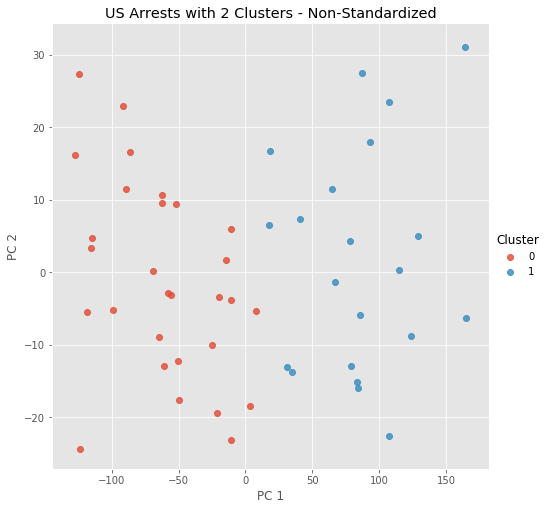

In [34]:
kmeans_clustering(principalDf, principalComponents, 'Non-Standardized')